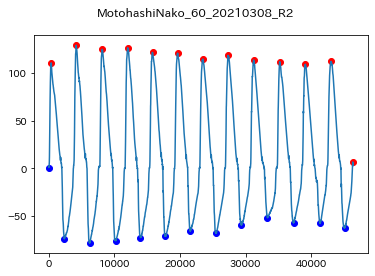

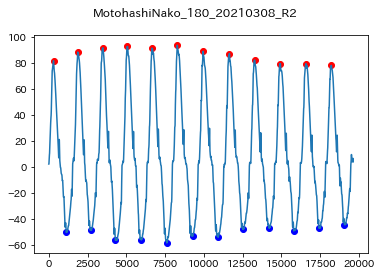

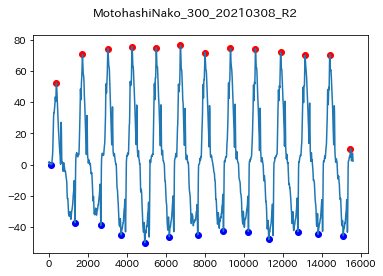

In [259]:
#必要事項の記入
name='MotohashiNako'#MyoujiNamae
deg_list=[60,180,300]#deg/sec
date='20210308'#yyyymmdd
leg='R2'#L/R

import pandas as pd
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import math
from matplotlib.font_manager import FontProperties
from IPython.display import display
import pathlib
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
from scipy import signal

for deg in deg_list:
    


    #pathの定義
    raw_dir='S:/10-MedicalCenter/21-コンディショニング課トレーニング/ハイパフォーマンスジム/選手-トレーニング/06-Biodex/for_analysis'
    dir_path=raw_dir+'/Raw-data'+'/'+name
    file_path=date+'_'+str(deg)+'_'+leg+'.txt'
    file_save_path=raw_dir+'/'+name+'/'+str(date)
    path=date+'_'+str(deg)+'_'+leg+'.txt'

    #ディレクトリなければ新規作成
    if not os.path.exists(file_save_path):
        os.makedirs(file_save_path)

    #ディレクトリの設定
    os.chdir(dir_path)

    #データの読み込み
    dat=pd.read_table(path, header=4, delim_whitespace=True, names=('msec', 'torque', 'position','dgree', 'velosity' ), index_col=0 )
    # print(dat)
    #時間とトルクをnumpyに変換
    time=np.array(dat.index)
    torque=np.array(dat['torque'])

    #高速フーリエ変換
    F=np.fft.fft(torque)
    F_abs = np.abs(F)
    N=len(data)
    dt=0.01#sampling rate
    # 振幅をもとの信号に揃える
    F_abs_amp = F_abs / N * 2 # 交流成分はデータ数で割って2倍
    F_abs_amp[0] = F_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要

    # 周波数軸のデータ作成
    fq = np.linspace(0, 1.0/dt, N) # 周波数軸　linspace(開始,終了,分割数)

    # 振幅強度でフィルタリング処理
    F3 = np.copy(F) # FFT結果コピー
    ac = 0.1 # 振幅強度の閾値
    F3[(F_abs_amp < ac)] = 0 # 振幅が閾値未満はゼロにする（ノイズ除去）
    # 振幅でフィルタリング処理した結果の確認
    # FFTの複素数結果を絶対値に変換
    F3_abs = np.abs(F3)
    # 振幅をもとの信号に揃える
    F3_abs_amp = F3_abs / N * 2 # 交流成分はデータ数で割って2倍
    F3_abs_amp[0] = F3_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要

    # 振幅強度でフィルタリング（ノイズ除去）-> IFFT
    F3_ifft = np.fft.ifft(F3) # IFFT
    F3_ifft_real = F3_ifft.real # 実数部の取得

    #波形のMax(伸展)とMin(屈曲)を検出
    if deg ==300:
        order_rate=50
    elif deg==180:
        order_rate=100
    else :
        order_rate=100
    maxid=signal.argrelmax(F3_ifft_real, order=order_rate)
    minid=signal.argrelmin(F3_ifft_real, order=order_rate)

    #グラフ作成
    fig=plt.figure()
    fig.suptitle(name+'_'+str(deg)+'_'+str(date)+'_'+leg)
    ax2=fig.add_subplot(111)
    ax2.plot(time[maxid],F3_ifft_real[maxid],"ro")
    ax2.plot(time[minid],F3_ifft_real[minid],"bo")
    ax2.plot(time, F3_ifft_real)
    plt.show()

    #保存用のディレクトリ準備
    #ディレクトリの設定
    os.chdir(file_save_path)
    #グラフの保存
    image_file_path=name+'_'+str(deg)+'_'+str(date)+'_'+leg+'_fig'
    fig.savefig(image_file_path)
    plt.close('all')

    #データの保存
    pd.DataFrame({'ext':torque[maxid]}).T.to_csv(name+'_'+str(deg)+'_'+str(date)+'_'+leg+'_ext.csv')
    pd.DataFrame({'fle':torque[maxid]}).T.to_csv(name+'_'+str(deg)+'_'+str(date)+'_'+leg+'_fle.csv')

20210302_180_R.txt
[ 0.   0.   0.  ... 13.2 13.  14.5]
[0.  0.5 0.5 ... 6.8 5.3 4.7]
1811
1314


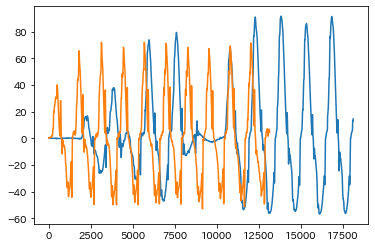

In [239]:
name='MotohashiNako'
deg=180
date='20210302'
leg='R'
#ディレクトリの設定
os.chdir(dir_path)

#データの読み込み
# data=pd.read_table(path, header=4, delim_whitespace=True, names=('msec', 'torque', 'position','dgree', 'velosity' ), index_col=0 )
# print(data)
#時間とトルクをnumpyに変換
# time=np.array(data.index)
# torque=np.array(data['torque'])
path=date+'_'+str(deg)+'_'+leg+'.txt'
print(path)

data=pd.read_table(path, header=4, delim_whitespace=True, names=('msec', 'torque', 'position','dgree', 'velosity' ), index_col=0 )
time=np.array(data.index)
time2=np.array(dat.index)
torque=np.array(data['torque'])
torque2=np.array(dat['torque'])

print(torque)
print(torque2)

plt.plot(time, torque)
plt.plot(time2, torque2)
print(len(time))
print(len(time2))

(array([ 229,  596,  881, 1079, 1228, 1532, 1682], dtype=int64),)


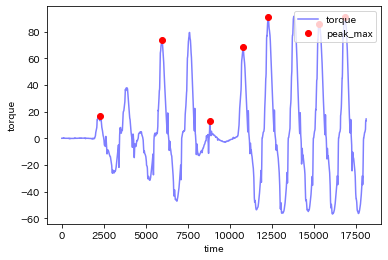

In [240]:


maxid=signal.argrelmax(torque, order=80)
minid=signal.argrelmin(torque, order=50)
def peak_detect(x,y,lab,ID):
    plt.plot(x, y, label=lab, c="blue", alpha=0.5)
    plt.plot(x[ID], y[ID], "ro", label="peak_max")
    plt.xlabel("time")
    plt.ylabel("torque")
    plt.legend(loc="upper right")
 
peak_detect(time,torque,"torque",maxid)
print(maxid)
# ax1=fig.add_subplot(111)
# ax1.plot(abs(dat['torque']))
# ax1.plot(dat.index,maxid, "ro")
# plt.show()
# plt.close('all')

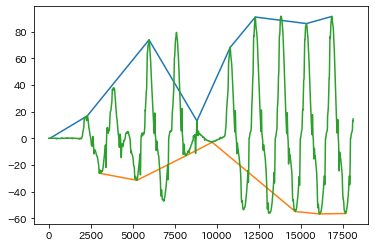

In [172]:
plt.plot(time[maxid],torque[maxid])
plt.plot(time[minid],torque[minid])
plt.plot(time, torque)

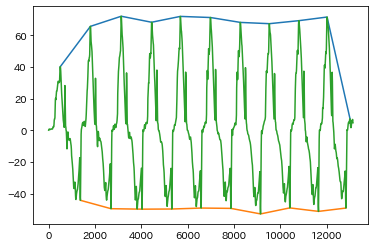

In [116]:
fig=plt.figure()
ax2=fig.add_subplot(111)
ax2.plot(time[maxid],torque[maxid])
ax2.plot(time[minid],torque[minid])
ax2.plot(time, torque)
plt.show()


image_file_path=name+'_'+str(deg)+'_'+str(date)+'_'+leg+'_fig'
fig.savefig(image_file_path)
plt.close('all')

pd.DataFrame({'ext':torque[maxid]}).T.to_csv(name+'_'+str(deg)+'_'+str(date)+'_'+leg+'_ext.csv')
pd.DataFrame({'fle':torque[maxid]}).T.to_csv(name+'_'+str(deg)+'_'+str(date)+'_'+leg+'_fle.csv')

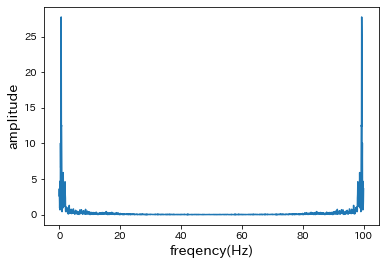

In [241]:
F=np.fft.fft(torque)
F_abs = np.abs(F)
N=len(data)
dt=0.01
# 振幅をもとの信号に揃える
F_abs_amp = F_abs / N * 2 # 交流成分はデータ数で割って2倍
F_abs_amp[0] = F_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要

# 周波数軸のデータ作成
fq = np.linspace(0, 1.0/dt, N) # 周波数軸　linspace(開始,終了,分割数)

# グラフ表示（FFT解析結果）
plt.xlabel('freqency(Hz)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.plot(fq, F_abs_amp)

In [242]:
F3=np.copy(F)

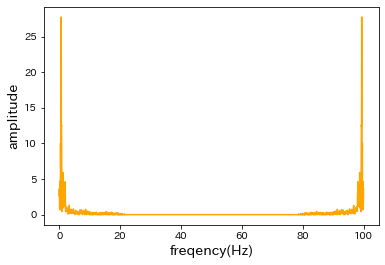

In [243]:
# 振幅強度でフィルタリング処理
F3 = np.copy(F) # FFT結果コピー
ac = 0.1 # 振幅強度の閾値
F3[(F_abs_amp < ac)] = 0 # 振幅が閾値未満はゼロにする（ノイズ除去）
# 振幅でフィルタリング処理した結果の確認
# FFTの複素数結果を絶対値に変換
F3_abs = np.abs(F3)
# 振幅をもとの信号に揃える
F3_abs_amp = F3_abs / N * 2 # 交流成分はデータ数で割って2倍
F3_abs_amp[0] = F3_abs_amp[0] / 2 # 直流成分（今回は扱わないけど）は2倍不要

# グラフ表示（FFT解析結果）
plt.xlabel('freqency(Hz)', fontsize=14)
plt.ylabel('amplitude', fontsize=14)
plt.plot(fq, F3_abs_amp, c='orange')

Text(0, 0.5, 'singnal')

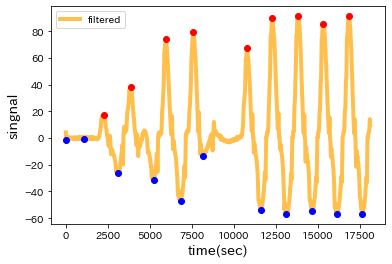

In [245]:
# 振幅強度でフィルタリング（ノイズ除去）-> IFFT
F3_ifft = np.fft.ifft(F3) # IFFT

maxid=signal.argrelmax(F3_ifft_real, order=100)
minid=signal.argrelmin(F3_ifft_real, order=100)
F3_ifft_real = F3_ifft.real # 実数部の取得
# グラフ（オリジナルとフィルタリングを比較）
# plt.plot(time, f, label='original')
plt.plot(time, F3_ifft_real, c="orange", linewidth=4, alpha=0.7, label='filtered')
plt.plot(time[maxid],F3_ifft_real[maxid],"ro")
plt.plot(time[minid],F3_ifft_real[minid],"bo")
plt.legend(loc='best')
plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('singnal', fontsize=14)